# Imports

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import pandas as pd
import heapq
from collections import Counter

# Dataset Import

In [5]:
train_file = "data/train.txt"
test_file = "data/test.txt"
movie_info_file = "data/movies.txt"

In [6]:
colnames = ['movie_id', 'title', 'unknown', "action", "adventure", "animation", 
            "childrens", "comedy", "crime", "documentary", "drama", "fantasy", 
            "film-noir", "horror", "musical", "mystery", "romance", "sci-fi", 
            "thriller", "war", "western"]

movie_info = pd.read_csv(movie_info_file, names=colnames, sep='\t', header=None)

In [7]:
train_np = np.loadtxt(train_file, dtype=int)
test_np = np.loadtxt(test_file, dtype=int)
all_np = np.vstack([train_np, test_np])

In [8]:
id_to_movie_title = movie_info['title'].tolist()
id_to_movie_title.insert(0, "NO MOVIE WITH ID 0")

In [10]:
movie_to_genre = dict()

for index, row in movie_info.iterrows():
    if row['title'] not in movie_to_genre:
        movie_to_genre[row['title']] = row['unknown':'western'].to_numpy()


# Visualizing All Ratings in MovieLens

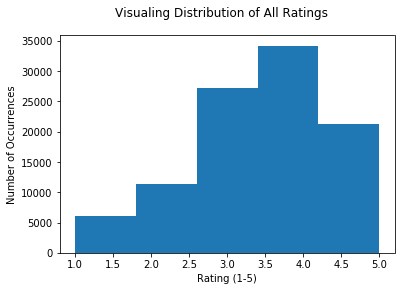

In [46]:
plt.figure()

plt.hist(all_np[:,-1], bins=5)
plt.suptitle("Visualing Distribution of All Ratings")
plt.xlabel("Rating (1-5)")
plt.ylabel("Number of Occurrences")

plt.show()

# Visualizing Ratings of 10 Most Popular (Most Rated) Movies

## Get List of Most Rated Movies

In [44]:
k = 10

unique, counts = np.unique(all_np[:, 1], return_counts=True)

rating_count = dict()

for u, count in zip(unique, counts):
    if id_to_movie_title[u] not in rating_count:
        rating_count[id_to_movie_title[u]] = 0
    rating_count[id_to_movie_title[u]] += count
    
popular_movies = [elem[0] for elem in Counter(rating_count).most_common(k)]

print(popular_movies)

['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)', 'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)', 'Independence Day (ID4) (1996)']


## Construct and Plot Most Popular Dataset

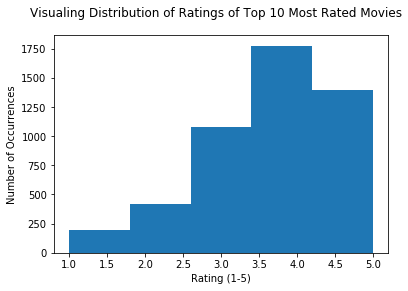

In [48]:
most_popular_ratings = []

for row in all_np:
    if id_to_movie_title[row[1]] in popular_movies:
        most_popular_ratings.append(row[2])

plt.figure()

plt.hist(most_popular_ratings, bins=5)
plt.suptitle("Visualing Distribution of Ratings of Top 10 Most Rated Movies")
plt.xlabel("Rating (1-5)")
plt.ylabel("Number of Occurrences")

plt.show()

# Visualizing Ratings of 10 Most Highly Rated Movies

## Get List of Most Highly Rated Movies

In [56]:
k = 10

movie_to_ratings = dict()

for row in all_np:
    if id_to_movie_title[row[1]] not in movie_to_ratings:
        movie_to_ratings[id_to_movie_title[row[1]]] = []
    movie_to_ratings[id_to_movie_title[row[1]]].append(row[-1])  
    
movie_to_avg_rating = dict()
    
for movie_title in movie_to_ratings:
    movie_to_avg_rating[movie_title] = np.mean(movie_to_ratings[movie_title])   
    
best_rated_movies = [elem[0] for elem in Counter(movie_to_avg_rating).most_common(k)]

## Construct and Plot Most Highly Rated Dataset

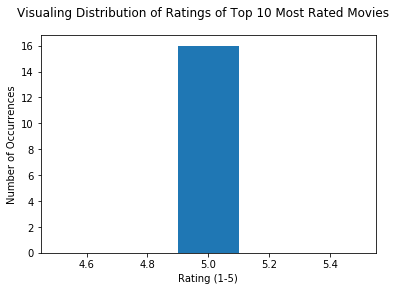

In [57]:
highly_rated_ratings = []

for row in all_np:
    if id_to_movie_title[row[1]] in best_rated_movies:
        highly_rated_ratings.append(row[2])

plt.figure()

plt.hist(highly_rated_ratings, bins=5)
plt.suptitle("Visualing Distribution of Ratings of Top 10 Most Rated Movies")
plt.xlabel("Rating (1-5)")
plt.ylabel("Number of Occurrences")

plt.show()

# Visualizing Ratings of 3 Chosen Genres

## Get List of Movies in the 3 Genres

In [59]:
ACTION = 1
DRAMA = 8
FANTASY = 9

chosen_movies = []

for movie in movie_to_genre:
    gv = movie_to_genre[movie]
    if (gv[ACTION] == 1 or gv[DRAMA] == 1 or gv[FANTASY]):
        chosen_movies.append(movie)

## Construct and Plot Genre Dataset

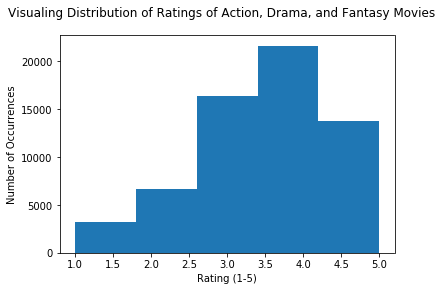

In [61]:
chosen_ratings = []

for row in all_np:
    if id_to_movie_title[row[1]] in chosen_movies:
        chosen_ratings.append(row[2])

plt.figure()

plt.hist(chosen_ratings, bins=5)
plt.suptitle("Visualing Distribution of Ratings of Action, Drama, and Fantasy Movies")
plt.xlabel("Rating (1-5)")
plt.ylabel("Number of Occurrences")

plt.show()